# Instructions:

1. Before you start: make a copy of this Colab Notebook on your own Google Drive. You won't be able to save any changes otherwise. Please, update the nameLastname wildcard on this file's name with your own information
2. Once you've finished, you'll need to export your results in a PDF format. For doing so, go to File > Print > Print on File.
3. Don't punish yourself! If you feel you got stuck, go to the next section. Some sections are easier than others.



---



---



# Python Evaluation

## 1. Use the requests python library for connecting to Wikipedia RESTful API to build a function called search that will look for any search term in Wikipedia data base and return the found pages' information.

### 1.1 Define a function called search with one single **input parameter** called search_term. This function will have JSON type **output** called response_content with the API response content.

   >Input (Type String): search_term
   >
   >Output (Type JSON): response_content

Hint 1: Use the Wikipedia Search API documentation to look for a functional python example [here](https://www.mediawiki.org/wiki/API:Search#GET_request) (You don't need to re-invent the wheel... if it already exists) and adapt the code example to your use case.

In [ ]:
# Main program:
try:
  import requests, json, IPython.display, pandas as pd #to perform HTTP requests (access resources on a server)
  from datetime import datetime
  from termcolor import colored
except ImportError as eImp:
    print(f"There was an error importing the next libraries: {eImp}");

def search(search_term):
  S = requests.Session(); #session object to persist data after the server connection ends

  URL = "https://en.wikipedia.org/w/api.php" #To operate on the English Wikipedia page

  #How we want to look and retrieve the data
  PARAMS = {
      "action": "query", #to fetch in the wiki pages
      "format": "json", #returning format
      "list": "search", #aggregation of data... e.g., # images, # users, or # pages matching the srsearch parameter
      "srsearch": search_term,
      "srlimit": 10, #to change the limit of the response. Default is 10
  };

  response_content = S.get(url=URL, params=PARAMS); #retrieving status from the search results in the given URL
  DATA = response_content.json(); #to properly work with the response in a JSON format in python
  if DATA['query']['searchinfo']['totalhits'] > 0:
    print(f"We found: {DATA['query']['searchinfo']['totalhits']} results with the query '{search_term}'.{chr(10)}")
    print(f"The search info used was the next:\n {DATA['query']['searchinfo']}\n")
    # print(f"The results of the search key of the wikipedia API is the next one: {searchResults}")
    print(f"The result contains {len(DATA['query'])} sections:{chr(10)+chr(9)}-{(chr(10)+chr(9)+'-').join([x for x in DATA['query']])}\n")# Total number of results
    return response_content
  print(colored('We couldn\'t find any Wikipedia Page with the query \''+search_term+'\'.', 'red'))
  return None




#Adding a form to dynamically accept queries
#@title Wikipedia RESTful API
#@markdown Please insert the query you want to retrieve and then click the 'run' bottom:
search_query =  "Apex Systems" #@param {type:"string"}
search_result = search(search_query);

#converting the first 10 results to a DF to show to user
if search_result:
  DATA = search_result.json();
  searchlist = [[x['title'], x['pageid'], x['size'], x['timestamp'].split("T")[0]] for x in DATA['query']['search']]
  df = pd.DataFrame(searchlist, columns=['title','page_id','size_bytes','last_edit'])
  print("The results of the search key of the wikipedia API is the next one:")
  display(df)


We found: 6601 results with the query 'Apex Systems'.

The search info used was the next:
 {'totalhits': 6601}

The result contains 2 sections:
	-searchinfo
	-search

The results of the search key of the wikipedia API is the next one:


,title,page_id,size_bytes,last_edit
0,APEX system,4986342,17382,2021-06-26
1,Apex,631088,5401,2022-10-05
2,Apex Legends,59851379,126643,2022-10-18
3,Apex predator,1872736,32931,2022-10-22
4,Apex Tool Group,25832079,5839,2022-04-04
5,"Apex, North Carolina",128297,26830,2022-10-05
6,Apex Digital,1552861,6047,2022-04-20
7,Oracle Application Express,962730,32548,2022-08-18
8,Ontronik Khachaturian,1883285,4838,2022-08-06
9,Lord Apex,66656892,7870,2022-09-30


## 2. Built your own class called WikipediaSearch. 
### 2.1 Define your class with the following methods:
- An __init__ method for initialzing the object with one single attribute called search_term.
- A **search** method for including the function you just built before. This method must take the search_term attribute as parameter to work.
- A get_results_table method. Be careful here: The input must be the same attribute search_term in the init method and the output will be a Pandas Data Frame Object called "results_df" like the showed below.

HINT 2: You'll need to identify the equivalent elements in the API JSON Response. [Json Beautifier](https://codebeautify.org/jsonviewer) is an option, but you can do whatever you want.

|title|wordcount|pageid|searchterm|timestamp|
|-----|---------|------|----------|---------|
|A page title you found| 13457  | 567  |The search term you defined|2021-22-09 10:45:33T|

 
  column names must match!
     


In [ ]:
try:
  import requests
  import pandas as pd
  import json
except ImportError as eImp:
    print(f"There was an error importing the next libraries: {eImp}")

class WikipediaSearch():
  def __init__(self, search_term): #method to create objects (core of OOP) to initialize class' attributes
    self.search_term = search_term #create the attribute and assign the given valye

  def search(self):
    return search(self.search_term)

  def get_results_table(self, searchResults):
    if searchResults:
      # query_json_formatted = json.dumps(searchResults.json(), indent=2)
      # print(query_json_formatted)
      query_search_json = searchResults.json()['query']['search']; #results in the search results only
    
    #Method to transform ALL the JSON attributes to a DF
    # dfsearch = pd.json_normalize(query_search_json) #to convert all the parts of the JSON in DF
    # display(dfsearch)
    # dfsearch = pd.json_normalize(query_search_json); #to convert all the parts of the JSON in DF
    # dfsearch['searchterm'] = self.search_term #assigning new column with value equals to the searchterm
    # dfsearch = dfsearch.drop(['ns', 'size','snippet'],1) #removing unwanted columns
    # dfsearch = dfsearch[['title', 'wordcount','pageid','searchterm', 'timestamp']] #sorting the columns
    # display(dfsearch);
   
    #to only get in a DF the columns 
      searchlist = [[x['title'], x['wordcount'], x['pageid'], self.search_term,x['timestamp']] for x in query_search_json]
      results_df = pd.DataFrame(searchlist, columns=['title','wordcount','pageid','searchterm', 'timestamp'])
      return results_df.head()
    return None

#@markdown #Wikipedia Class OOP
#@markdown Please enter the query you want to look for in Wikipedia:
search_term = "Systema" #@param {type: "string"}
wiki = WikipediaSearch(search_term);
# print(f"The query for the Wikipedia object is '{wiki.search_term}'");
searchResults = wiki.search()
wiki.get_results_table(searchResults)

We found: 4063 results with the query 'Systema'.

The search info used was the next:
 {'totalhits': 4063, 'suggestion': 'system', 'suggestionsnippet': 'system'}

The result contains 2 sections:
	-searchinfo
	-search



,title,wordcount,pageid,searchterm,timestamp
0,Systema,590,322686,Systema,2022-08-04T19:57:37Z
1,Systema Naturae,1833,1478634,Systema,2022-09-04T18:09:04Z
2,10th edition of Systema Naturae,2421,28292088,Systema,2022-09-14T21:54:27Z
3,Systema (disambiguation),97,7831195,Systema,2018-12-13T15:00:12Z
4,Nervous system,9329,21944,Systema,2022-06-14T17:33:05Z


### 2.2 Test your class!
- Define a function called author_search. This will take a list as an input parameter and return a pandas data frame with the same columns as the defined before, but including the results for all the elements in the list.
   >Input (Type List): author_list
   >
   >Output (Type Pandas Data Frame): df
- Use it for querying:

|author_list|
|------|
|Douglas Adams|
|Isaac Asimov|
|Stanislaw Lem|

In [ ]:
def author_search(author_list):
  df = pd.DataFrame(columns=['title','wordcount','pageid','searchterm', 'timestamp'])
  for query in author_list:
    wiki = WikipediaSearch(query); #create a class for each item
    searchResults = wiki.search() #perform the wiki search for each item
    df = df.append(wiki.get_results_table(searchResults), ignore_index =True);
    print('_________________________________________________________________________________________')
  return df

author_list =  ['Douglas Adams', 'Isaac Asimov', 'Stanislaw Lem'] #@param {type:"raw"}
author_search(author_list)

We found: 20126 results with the query 'Douglas Adams'.

The search info used was the next:
 {'totalhits': 20126}

The result contains 2 sections:
	-searchinfo
	-search

_________________________________________________________________________________________
We found: 2820 results with the query 'Isaac Asimov'.

The search info used was the next:
 {'totalhits': 2820}

The result contains 2 sections:
	-searchinfo
	-search

_________________________________________________________________________________________
We found: 527 results with the query 'Stanislaw Lem'.

The search info used was the next:
 {'totalhits': 527, 'suggestion': 'stanislaw le', 'suggestionsnippet': 'stanislaw le'}

The result contains 2 sections:
	-searchinfo
	-search

_________________________________________________________________________________________


,title,wordcount,pageid,searchterm,timestamp
0,Douglas Adams,7541,8091,Douglas Adams,2022-10-28T11:16:56Z
1,Douglas Adams (disambiguation),116,1167171,Douglas Adams,2021-11-26T10:53:50Z
2,Phrases from The Hitchhiker's Guide to the Galaxy,5043,1063385,Douglas Adams,2022-10-26T14:12:34Z
3,Somebody else's problem,445,17817055,Douglas Adams,2022-01-16T00:16:27Z
4,The Hitchhiker's Guide to the Galaxy,11818,31353,Douglas Adams,2022-10-27T21:13:27Z
5,Isaac Asimov,21008,14573,Isaac Asimov,2022-10-04T16:43:32Z
6,Foundation series,6423,60133,Isaac Asimov,2022-10-04T05:55:12Z
7,Robot series,1746,60134,Isaac Asimov,2022-10-08T05:21:30Z
8,Isaac Asimov bibliography (chronological),4031,43290476,Isaac Asimov,2022-07-14T15:37:50Z
9,Three Laws of Robotics,9201,60136,Isaac Asimov,2022-08-27T02:07:48Z


## Take a look at your work!!
Insert a valid list on the author_list input parameter and see what your function does!

In [ ]:
#@title First Evaluation
author_list = ["Douglas Adams", "Isaac Asimov", "Jorge Luis Borges"] #@param {type:"raw"}
Report = author_search(author_list)
Report

We found: 20125 results with the query 'Douglas Adams'.

The search info used was the next:
 {'totalhits': 20125}

The result contains 2 sections:
	-searchinfo
	-search

_________________________________________________________________________________________
We found: 2820 results with the query 'Isaac Asimov'.

The search info used was the next:
 {'totalhits': 2820}

The result contains 2 sections:
	-searchinfo
	-search

_________________________________________________________________________________________
We found: 2630 results with the query 'Jorge Luis Borges'.

The search info used was the next:
 {'totalhits': 2630}

The result contains 2 sections:
	-searchinfo
	-search

_________________________________________________________________________________________


,title,wordcount,pageid,searchterm,timestamp
0,Douglas Adams,7541,8091,Douglas Adams,2022-10-28T11:16:56Z
1,Douglas Adams (disambiguation),116,1167171,Douglas Adams,2021-11-26T10:53:50Z
2,Phrases from The Hitchhiker's Guide to the Galaxy,5043,1063385,Douglas Adams,2022-10-26T14:12:34Z
3,Somebody else's problem,445,17817055,Douglas Adams,2022-01-16T00:16:27Z
4,The Hitchhiker's Guide to the Galaxy,11818,31353,Douglas Adams,2022-10-27T21:13:27Z
5,Isaac Asimov,21008,14573,Isaac Asimov,2022-10-04T16:43:32Z
6,Foundation series,6423,60133,Isaac Asimov,2022-10-04T05:55:12Z
7,Robot series,1746,60134,Isaac Asimov,2022-10-08T05:21:30Z
8,Galactic Empire (Asimov),4661,528471,Isaac Asimov,2022-08-18T23:06:08Z
9,Nightfall (Asimov novelette and novel),1739,677813,Isaac Asimov,2022-03-16T04:00:06Z




---



---



# SQL Evaluation
In this evaluation, you'll be using two Open Source data sets for answering some questions about dogs. These are available as CSV files in [here](https://drive.google.com/drive/folders/1bdzhZY6fAYXWV8-g_pb5qjBP-c-t9geI?usp=sharing)
. "puppies.csv" has data of some doggy licences registered in the United States, while "zipcodes.csv" provides information about zip codes, states and counties.

## 1. Setting this little environment up.
- 1.1 Upload the csv files into this notebook.
- 1.2 Execute the next instance for loading pandasql: a little SQL interpreter than runs over Pandas Data Frames.

In [1]:
!pip install pandasql
import pandasql

#@markdown Please enter the two Google Drive link ID from both Zip and Puppy CSV files.
#to upload the files we will connect them directly from google drive
!gdown --id 14AwPMaEPEJ8t2RZUD-OCC3PPJZrNaQhD #puppies GDrive id 
!gdown --id 18STHplvNaH-mJ9zH2t1VZbzl7Sx4H96o #zip codes GDrive id 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=56f180d34225212b5fdc96ba5f9e5acdeb6eb859ed491099ed9f76159ca32be7
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=14AwPMaEPEJ8t2RZUD-OCC3PPJZrNaQhD
To: /content/puppies.csv
100% 4.22M/4.22M [00:00<00:00, 126MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading..

- 1.3 Create pandas data frames for loading these two CSV files. Keep the names.

In [135]:
try:
  import pandas as pd, IPython.display
except ImportError as eImp:
  print(f"There was an error importing the next libraries: {eImp}")

frame1= pd.read_csv("puppies.csv", delimiter= ",")
frame2= pd.read_csv("zipcodes.csv", delimiter= ",")
display(frame1)
display(frame2)

,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,Dog Individual Spayed Female,GOLDENDOODLE,GOLD,TALLY,15227,2016,2/16/2016 14:55
1,Dog Senior Citizen or Disability Spayed Female,CHIHUAHUA,WHITE/BLACK/BROWN,CHALUPA,15120,2016,1/11/2016 15:23
2,Dog Individual Neutered Male,GER SHORTHAIR POINT,SPOTTED,JINX,15236,2016,12/22/2015 15:32
3,Dog Senior Citizen or Disability Female,BEAGLE,MULTI,JACKPINE JERUSALEM,15044,2016,12/17/2015 12:28
4,Dog Senior Citizen or Disability Female,BEAGLE,MULTI,JACKPINE JORDAN,15044,2016,12/17/2015 12:28
...,...,...,...,...,...,...,...
48740,Dog Individual Female,BOXER,BRINDLE,RUBY,15116,2017,3/27/2017 14:47
48741,Dog Individual Spayed Female,MIXED,WHITE/BLACK,STELLALUNA,15216,2017,3/27/2017 14:53
48742,Dog Individual Male,LABRADOR RETRIEVER,BLACK,JAXXON,15112,2017,3/27/2017 14:53
48743,Dog Individual Female,GER SHEPHERD,BLACK/TAN,BONNIE,15202,2017,3/28/2017 8:45


,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1
...,...,...,...,...,...
52884,850,St. Croix Island,VI,78010,H4
52885,840,St. Croix Island,VI,78010,H4
52886,820,St. Croix Island,VI,78010,H4
52887,830,St. John Island,VI,78020,H4


- 1.4 Answer the following questions with an output data frame from an SQL query:  
  - Query1: For all the dog licences expided in 2017, query the Top 10 most popular dog breeds.
  - Query2: In which county were the most of Chihuahas registered in 2016?
  - Query3: For all years and counties, which were the 5 most popular dog names?
  - Query4: Considering the average dog population for all breeds, select the breed column and add an additional column named "is_popular". This column's value will be True, if the breed population is (strictly) above the average, otherwise will be False. Discard any null values for Breed column in the average calculation.


Example Code:
```
Q1 = """SELECT *
        FROM data_frame_identical_name"""

pandasql.sqldf(Q1)
```
Expected Result:
Type: Data Frame

|   |column 1|column2|
|---|--------|-------|
|0  |value   | value |


,Breed,Total,ExpYear
0,MIXED,2300,2017
1,LABRADOR RETRIEVER,1379,2017
2,LAB MIX,1194,2017
3,GER SHEPHERD,748,2017
4,GOLDEN RETRIEVER,694,2017
5,SHIH TZU,636,2017
6,CHIHUAHUA,626,2017
7,AM PIT BULL TERRIER,595,2017
8,BEAGLE,590,2017
9,TAG,554,2017


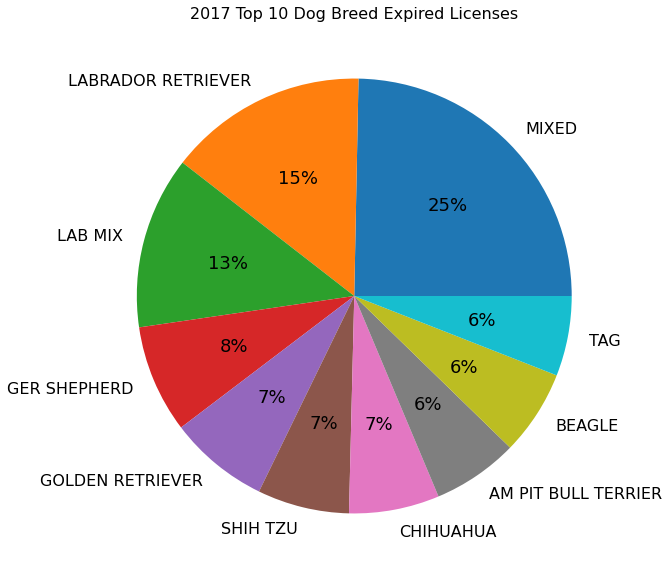

In [138]:
#Query1: For all the dog licences expided in 2017, query the Top 10 most popular dog breeds.
try:
  import matplotlib.pyplot as plt
except ImportError as eImp:
  print(f"There was an error importing the next libraries: {eImp}")
#@markdown Please insert the desired Expiration Year to look for the most popular dog breeds. Also, insert the number of breed you want to see.
expiration = 2017 #@param {type:"integer"} 
limitbreeds = 10 #@param {type:"integer"} 

Q1 = """SELECT Breed, COUNT(Breed) AS Total, ExpYear
        FROM frame1 
        WHERE ExpYear = """+str(expiration)+"""
        GROUP BY Breed
        ORDER BY Total DESC
        LIMIT """+str(limitbreeds)+"""
        """
dfsqlQ1 = pandasql.sqldf(Q1)
display(dfsqlQ1)



#displaying the results in a graph
plt.figure(figsize=(14,10))
plt.pie([x[1] for x in dfsqlQ1.values.tolist()], labels=[x[0] for x in dfsqlQ1.values.tolist()], autopct = '%1.0f%%');
plt.title(str(expiration)+' Top '+str(limitbreeds)+ ' Dog Breed Expired Licenses',fontdict={'fontsize': 16});
plt.rcParams['font.size'] = 18
plt.rc('ytick', labelsize=16)

The total number of CHIHUAHUA dogs registered in 2016 was: 829
As some counties share the same ZIP codes, we will use the first county for the repeated ZIP codes to do the calculation
_____________________________________________________________________


,Breed,TotalPerCounty,COUNTYNAME,STATE
0,CHIHUAHUA,829,Allegheny County,PA




_____________________________________________________________________
The county with more CHIHUAHua dogs registered in 2016 was: Allegheny County


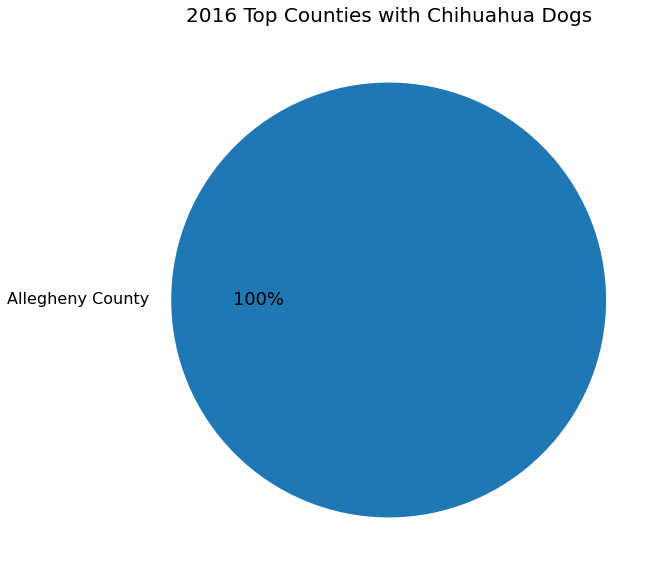

In [139]:
#Query2: In which county were the most of Chihuahas registered in 2016?
try:
  import matplotlib.pyplot as plt
  from termcolor import colored
except ImportError as eImp:
  print(f"There was an error importing the next libraries: {eImp}")

#@markdown #Dog Breed Distribution By County (Alphabetical Order) and Registration Year
#@markdown Please select the dog breed and the year you are interested in.
dog_breed = "CHIHUAHua" #@param {type: "string"}
year = 2016 #@param {type: "integer"}
#@markdown There are repeated ZIP codes accross different counties, and we have no data to discern to which county is the puppies zip code referring to. We will order the counties alphabetically and use either the first or last one for a given zip code to correlate with the puppies table. Please select either if you want the first or last county to do the calculation:
alph_sorting = 'first' #@param ['first', 'last'] {allow-input:false}


#we need to change the type to Date object
frame1['ValidDate'] = pd.to_datetime(frame1['ValidDate']) 
#To see all the registers of chihuahas in 2016
# QEachTotal = """
#         SELECT Breed, OwnerZip, strftime('%Y', ValidDate) AS YearRegister
#         FROM frame1
#         WHERE YearRegister = '"""+str(year)+""" AND Breed = '"""+dog_breed+"""'
#         """

Qtotal = """
        SELECT UPPER(frame1.Breed), COUNT(*)
        FROM frame1
        WHERE strftime('%Y', ValidDate) = '"""+str(year)+"""' AND Breed = '"""+dog_breed.upper()+"""'
        """
print(f"The total number of {dog_breed.upper()} dogs registered in {year} was: {pandasql.sqldf(Qtotal).values[0][1]}");


print(f"As some counties share the same ZIP codes, we will use the {alph_sorting} county for the repeated ZIP codes to do the calculation\n_____________________________________________________________________");


sql_order = lambda x: 'DESC' if (x=='first') else 'ASC'; #as the group by is returning the last row instead of the first
#grouping the zip code table based on the zip code. For this we need to first sort the data in order to get the 1st or last county depending on user preference
Q2 = """
      WITH tempFrame2 AS 
      (SELECT *
      FROM (
        SELECT * FROM frame2
        ORDER BY ZIP ASC, COUNTYNAME """+sql_order(alph_sorting)+"""
        )
      GROUP BY ZIP)

      SELECT  UPPER(frame1.Breed) AS Breed, COUNT(*) AS TotalPerCounty, tempFrame2.COUNTYNAME, tempFrame2.STATE
      FROM frame1
      INNER JOIN tempFrame2
      ON frame1.OwnerZip = tempFrame2.ZIP
      WHERE strftime('%Y', ValidDate) = '"""+str(year)+"""' AND Breed = '"""+dog_breed.upper()+"""' 
      GROUP BY tempFrame2.COUNTYNAME
      ORDER BY TotalPerCounty DESC
     """
dfsqlQ2 = pandasql.sqldf(Q2)
display(dfsqlQ2)


print("\n\n_____________________________________________________________________");
if len(dfsqlQ2['COUNTYNAME'])>0:
  print(colored("The county with more " + dog_breed + " dogs registered in "+ str(year) + " was: " + dfsqlQ2['COUNTYNAME'][0], 'green'));

  #displaying the results in a graph
  plt.figure(figsize=(14,10))
  plt.pie(dfsqlQ2['TotalPerCounty'].values.tolist(), labels=dfsqlQ2['COUNTYNAME'].values.tolist(), autopct = '%1.0f%%');
  plt.title(str(year)+' Top Counties with ' + dog_breed.title() + ' Dogs',fontdict={'fontsize': 20});
  plt.rc('ytick', labelsize=16)
  plt.rcParams['font.size'] = 18
else:
   print(colored('We couldn\'t find any result for the dog breed \''+dog_breed.upper()+'\' in '+str(year), 'red'))


,DogName,Total
0,BELLA,739
1,BUDDY,577
2,MAX,477
3,BAILEY,426
4,LUCY,426


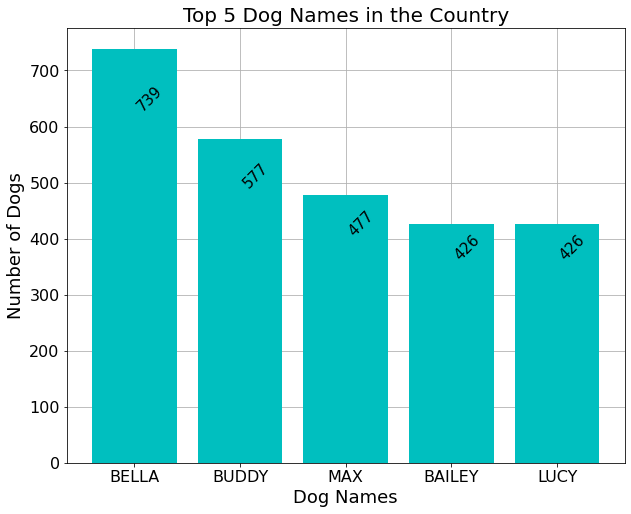

In [140]:
#Query3: For all years and counties, which were the 5 most popular dog names?

try:
  import matplotlib.pyplot as plt
except ImportError as eImp:
  print(f"There was an error importing the next libraries: {eImp}")

Q3 = """
      SELECT DogName, COUNT(DogName) AS Total
      FROM frame1
      GROUP BY DogName 
      ORDER BY Total DESC
      LIMIT 5 
      """

dfsqlQ3 = pandasql.sqldf(Q3);
display(dfsqlQ3);

fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.grid(zorder=0)
plt.bar(dfsqlQ3['DogName'].values, dfsqlQ3['Total'].values, color='c', zorder=2);
plt.xlabel('Dog Names');
plt.ylabel('Number of Dogs');
plt.title('Top 5 Dog Names in the Country', fontdict={'fontsize':20});
# plt.rcParams["figure.figsize"] = (20,3)
for ii, jj in enumerate(dfsqlQ3['Total'].values):
  ax.text(ii, jj*0.85, jj, color='black', fontsize=15,rotation=45)

In [91]:
!pip install circlify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Breed,breed_population,all_avg,is_popular
0,MIXED,5241,165.646259,TRUE
1,LABRADOR RETRIEVER,3166,165.646259,TRUE
2,LAB MIX,2792,165.646259,TRUE
3,GER SHEPHERD,1674,165.646259,TRUE
4,GOLDEN RETRIEVER,1521,165.646259,TRUE
...,...,...,...,...
290,SKYE TERRIER,1,165.646259,FALSE
291,STABYHOUN,1,165.646259,FALSE
292,SUSSEX SPANIEL,1,165.646259,FALSE
293,TREEING CUR,1,165.646259,FALSE


________________________________________________________________________________________________________


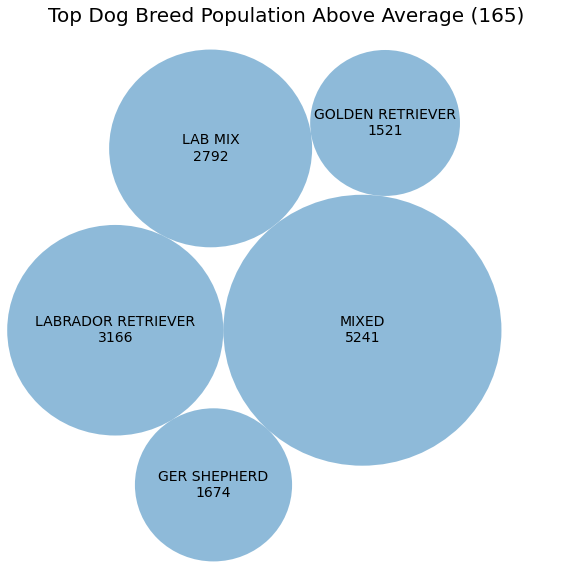

In [141]:
#Query4: Considering the average dog population for all breeds, select the breed column and add an additional 
#column named "is_popular". This column's value will be True, if the breed population is (strictly) 
#above the average, otherwise will be False. Discard any null values for Breed column in the average calculation.

# Keep it simple! Extra points if you use a WITH clause!

try:
  import circlify, matplotlib.pyplot as plt
except ImportError as eImp:
  print(f"There was an error importing the next libraries: {eImp}")

Q4 = """WITH cte_breed_avg AS 
        (SELECT Breed, COUNT(Breed) AS breed_population
        FROM frame1
        GROUP BY Breed),

        cte_all_avg AS 
        (SELECT AVG(breed_population) AS all_avg
        FROM cte_breed_avg
        WHERE Breed <> '.'),

        cte_above_avg AS
        (SELECT *, 'TRUE' AS is_popular
        FROM cte_breed_avg
        LEFT JOIN cte_all_avg
        ON cte_breed_avg.breed_population > cte_all_avg.all_avg
        WHERE cte_breed_avg.breed_population > cte_all_avg.all_avg),

        cte_below_avg AS
        (SELECT *, 'FALSE' AS is_popular
        FROM cte_breed_avg
        LEFT JOIN cte_all_avg
        ON cte_breed_avg.breed_population <= cte_all_avg.all_avg
        WHERE cte_breed_avg.breed_population < cte_all_avg.all_avg)

        SELECT *
        FROM cte_below_avg
        UNION
        SELECT *
        FROM cte_above_avg
        ORDER BY breed_population DESC
      """

df_population = pandasql.sqldf(Q4);
display(df_population)


print("________________________________________________________________________________________________________")
top_popular = pandasql.sqldf(Q4);
top_popular = top_popular.iloc[0:5];

circles = circlify.circlify(
    list(reversed(top_popular['breed_population'].tolist())), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

fig, ax = plt.subplots(figsize=(10,10))
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
ax.axis('off')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
ax.set_title('Top Dog Breed Population Above Average ('+str(int(df_population['breed_population'].mean()))+')', fontdict={'fontsize':20})
for circle, label, label_value in zip(circles, list(reversed(top_popular['Breed'].tolist())), list(reversed(top_popular['breed_population'].tolist()))):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=2))
    plt.annotate(
          label + '\n' + str(label_value), 
          (x,y),
          va='center',
          ha='center',
          fontsize=14
     )
    


##### Another way was:
# Q4 = """WITH temporaryTable AS 
#         (SELECT Breed, COUNT(Breed) AS breed_population
#         FROM frame1
#         WHERE Breed <> '.'
#         GROUP BY Breed)

#         SELECT Breed, breed_population
#         FROM temporaryTable
#       """
# df_population = pandasql.sqldf(Q4);
# print(f"The mean dog population is {round(df_population['breed_population'].mean(),2)}");
# df_population.loc[df_population['breed_population']>df_population['breed_population'].mean(), 'is_popular'] = 'True'
# df_population.loc[df_population['is_popular'] != 'True', 'is_popular'] = 'False'
# display(df_population)

# Q5 = """
#     SELECT * 
#     FROM df_population
#     WHERE is_popular = 'True'
#     ORDER BY breed_population DESC
#     LIMIT 5
#     """

# print("________________________________________________________________________________________________________")
# top_popular = pandasql.sqldf(Q5)


# Humor Sense!

For some extra points... I like memes!
Tell me how did you feel while you were on this evaluation with a meme using [Meme Generator](https://imgflip.com/memegenerator) and paste it right here using mark down :)

![image](https://i.imgflip.com/5o2j3h.jpg)

# Meme Challenge

1. How I felt: 

![The Office Crying Meme](https://i.imgflip.com/6ywwty.jpg)


2. My progress while solving this challenge:

![Programming Google Meme](https://i.imgflip.com/6ywx7r.jpg)


